## datasets 和 dataloaders

这个两个API函数就是用来从模型训练中分离数据预处理以及加载，这样做的两个目的：
- 代码的可读性更好
- 代码的模块更好

两个重要的AI函数：
- `torch.utils.data.Dataset`: 这个用来加载预存放的数据集:包含数据集和标签
- `torch.utils.data.DataLoader`:用来将Dataset数据集打包成方便调用的迭代器


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

In [59]:
print(type(training_data))
print(len(training_data))
print(training_data[0][0].shape)

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000
torch.Size([1, 28, 28])


In [29]:
# torch 中 randint
# torch 生成随机数的案例
a = torch.randint(110, size=(1,))
b = torch.randint(110, size=(2,5))
c = torch.randint(2,5, size=(3,3))
print(a)
print(b)
print(c)

tensor([102])
tensor([[59, 89, 32, 37, 91],
        [80, 84, 45, 97, 58]])
tensor([[3, 4, 2],
        [2, 4, 2],
        [4, 4, 3]])


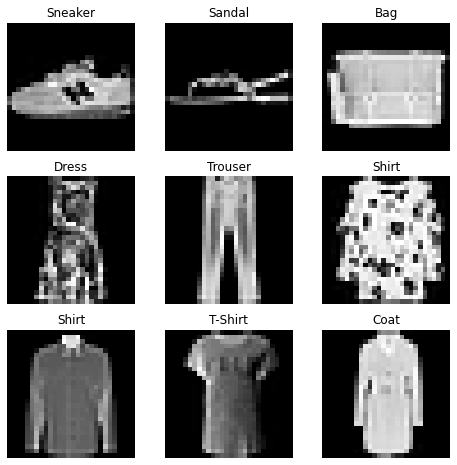

In [61]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # 获得dataset的地方
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")